In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

from google.colab import files
uploaded = files.upload()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Saving train.csv to train (11).csv


In [ ]:
import pandas as pd
train = pd.read_csv("train.csv")

#printing all columns having null value(s)
l=list(train.columns)
print("columns having null value(s)are:")
for i in range(len(l)):
  if(train.isnull().any()[i]==True):
    print(l[i]," ")
print("\n")

columns having null value(s)are:
Age  
Cabin  
Embarked  




In [ ]:
#since it is found that embark has null value(s), replace null values with the most occuring elements
maxel=train['Embarked'].value_counts().max()
train.fillna(maxel)
print("Embarked column after replacing its null value(s) with the most occuring value is:")
print(train["Embarked"])

Embarked column after replacing its null value(s) with the most occuring value is:
0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


In [ ]:
#check for columns with more than 50% null vlues to total number of rows to drop them
totrows=len(train.index)
print("Columns to be deleted are:")
for column in train:
  nullincol=train[column].isnull().sum()
  r=nullincol/totrows
  if(r>0.5):
    print(column)
    del[column]

Columns to be deleted are:
Cabin


In [ ]:

#drop all rows having null valu(s)
train.dropna()

#rename to embark
train.rename(columns={'Embarked':'Embark'},inplace = True)

#transforming values
train['Embark'].replace(['C','Q','S'],[0,1,2],inplace=True)

print(train['Embark'])

0      2.0
1      0.0
2      2.0
3      2.0
4      2.0
      ... 
886    2.0
887    2.0
888    2.0
889    0.0
890    1.0
Name: Embark, Length: 891, dtype: float64


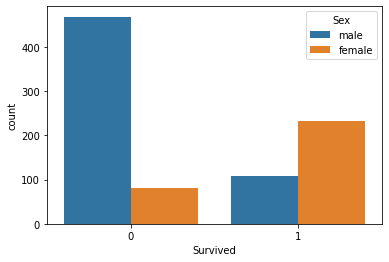

In [ ]:
import seaborn as sns
sns.countplot(x='Survived',hue='Sex',data=train)

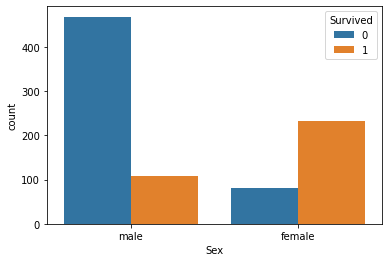

In [ ]:
sns.countplot(x='Sex',hue='Survived',data=train)

Graph 1: We see that a lot more of males have not survived than females and a lot more females have survived than the males

Graph 2: We see that there are a lot more female survivors that non-survivors and a lot less male survivors that non-survivors



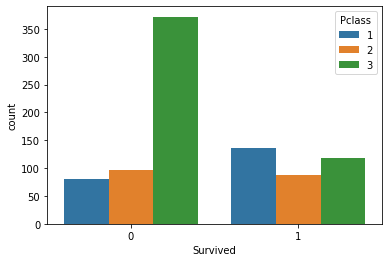

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=train)


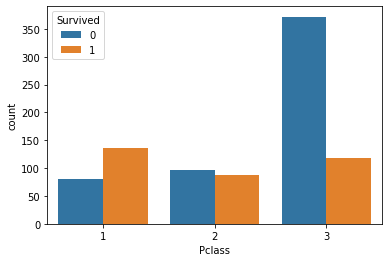

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=train)

Graph 1: We see that amongst the non-survivors, passergers of Pclass 3 are the most in mumber then 2 and then 1 being the least.
And amongst those that survived, there is not that much of a difference as those that didn't.




Graph 2: We see that amongst:

Class 1-more survivors (decent difference)

Class 2-more non survivors (very little/insignificant difference)

Class 3-more non survivors (quite a significant difference) 